<a href="https://colab.research.google.com/github/shreyanshrao/olympics/blob/main/olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_excel("Athletes.xlsx")

In [7]:
df.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [11]:
plt.figure(figsize=(100,60))
country_counts = df['NOC'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title("🏅 Medals per Country")
plt.xlabel("Country")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-11-1677283919.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
/tmp/ipython-input-11-1677283919.py:8: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


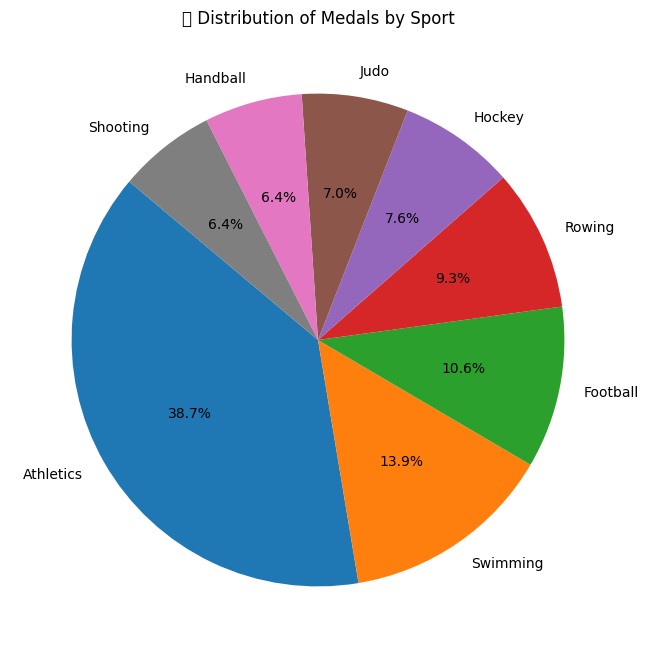

In [12]:
sport_counts = df['Discipline'].value_counts().head(8)  # top 8 sports
plt.figure(figsize=(8,8))
plt.pie(sport_counts, labels=sport_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("🥇 Distribution of Medals by Sport")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


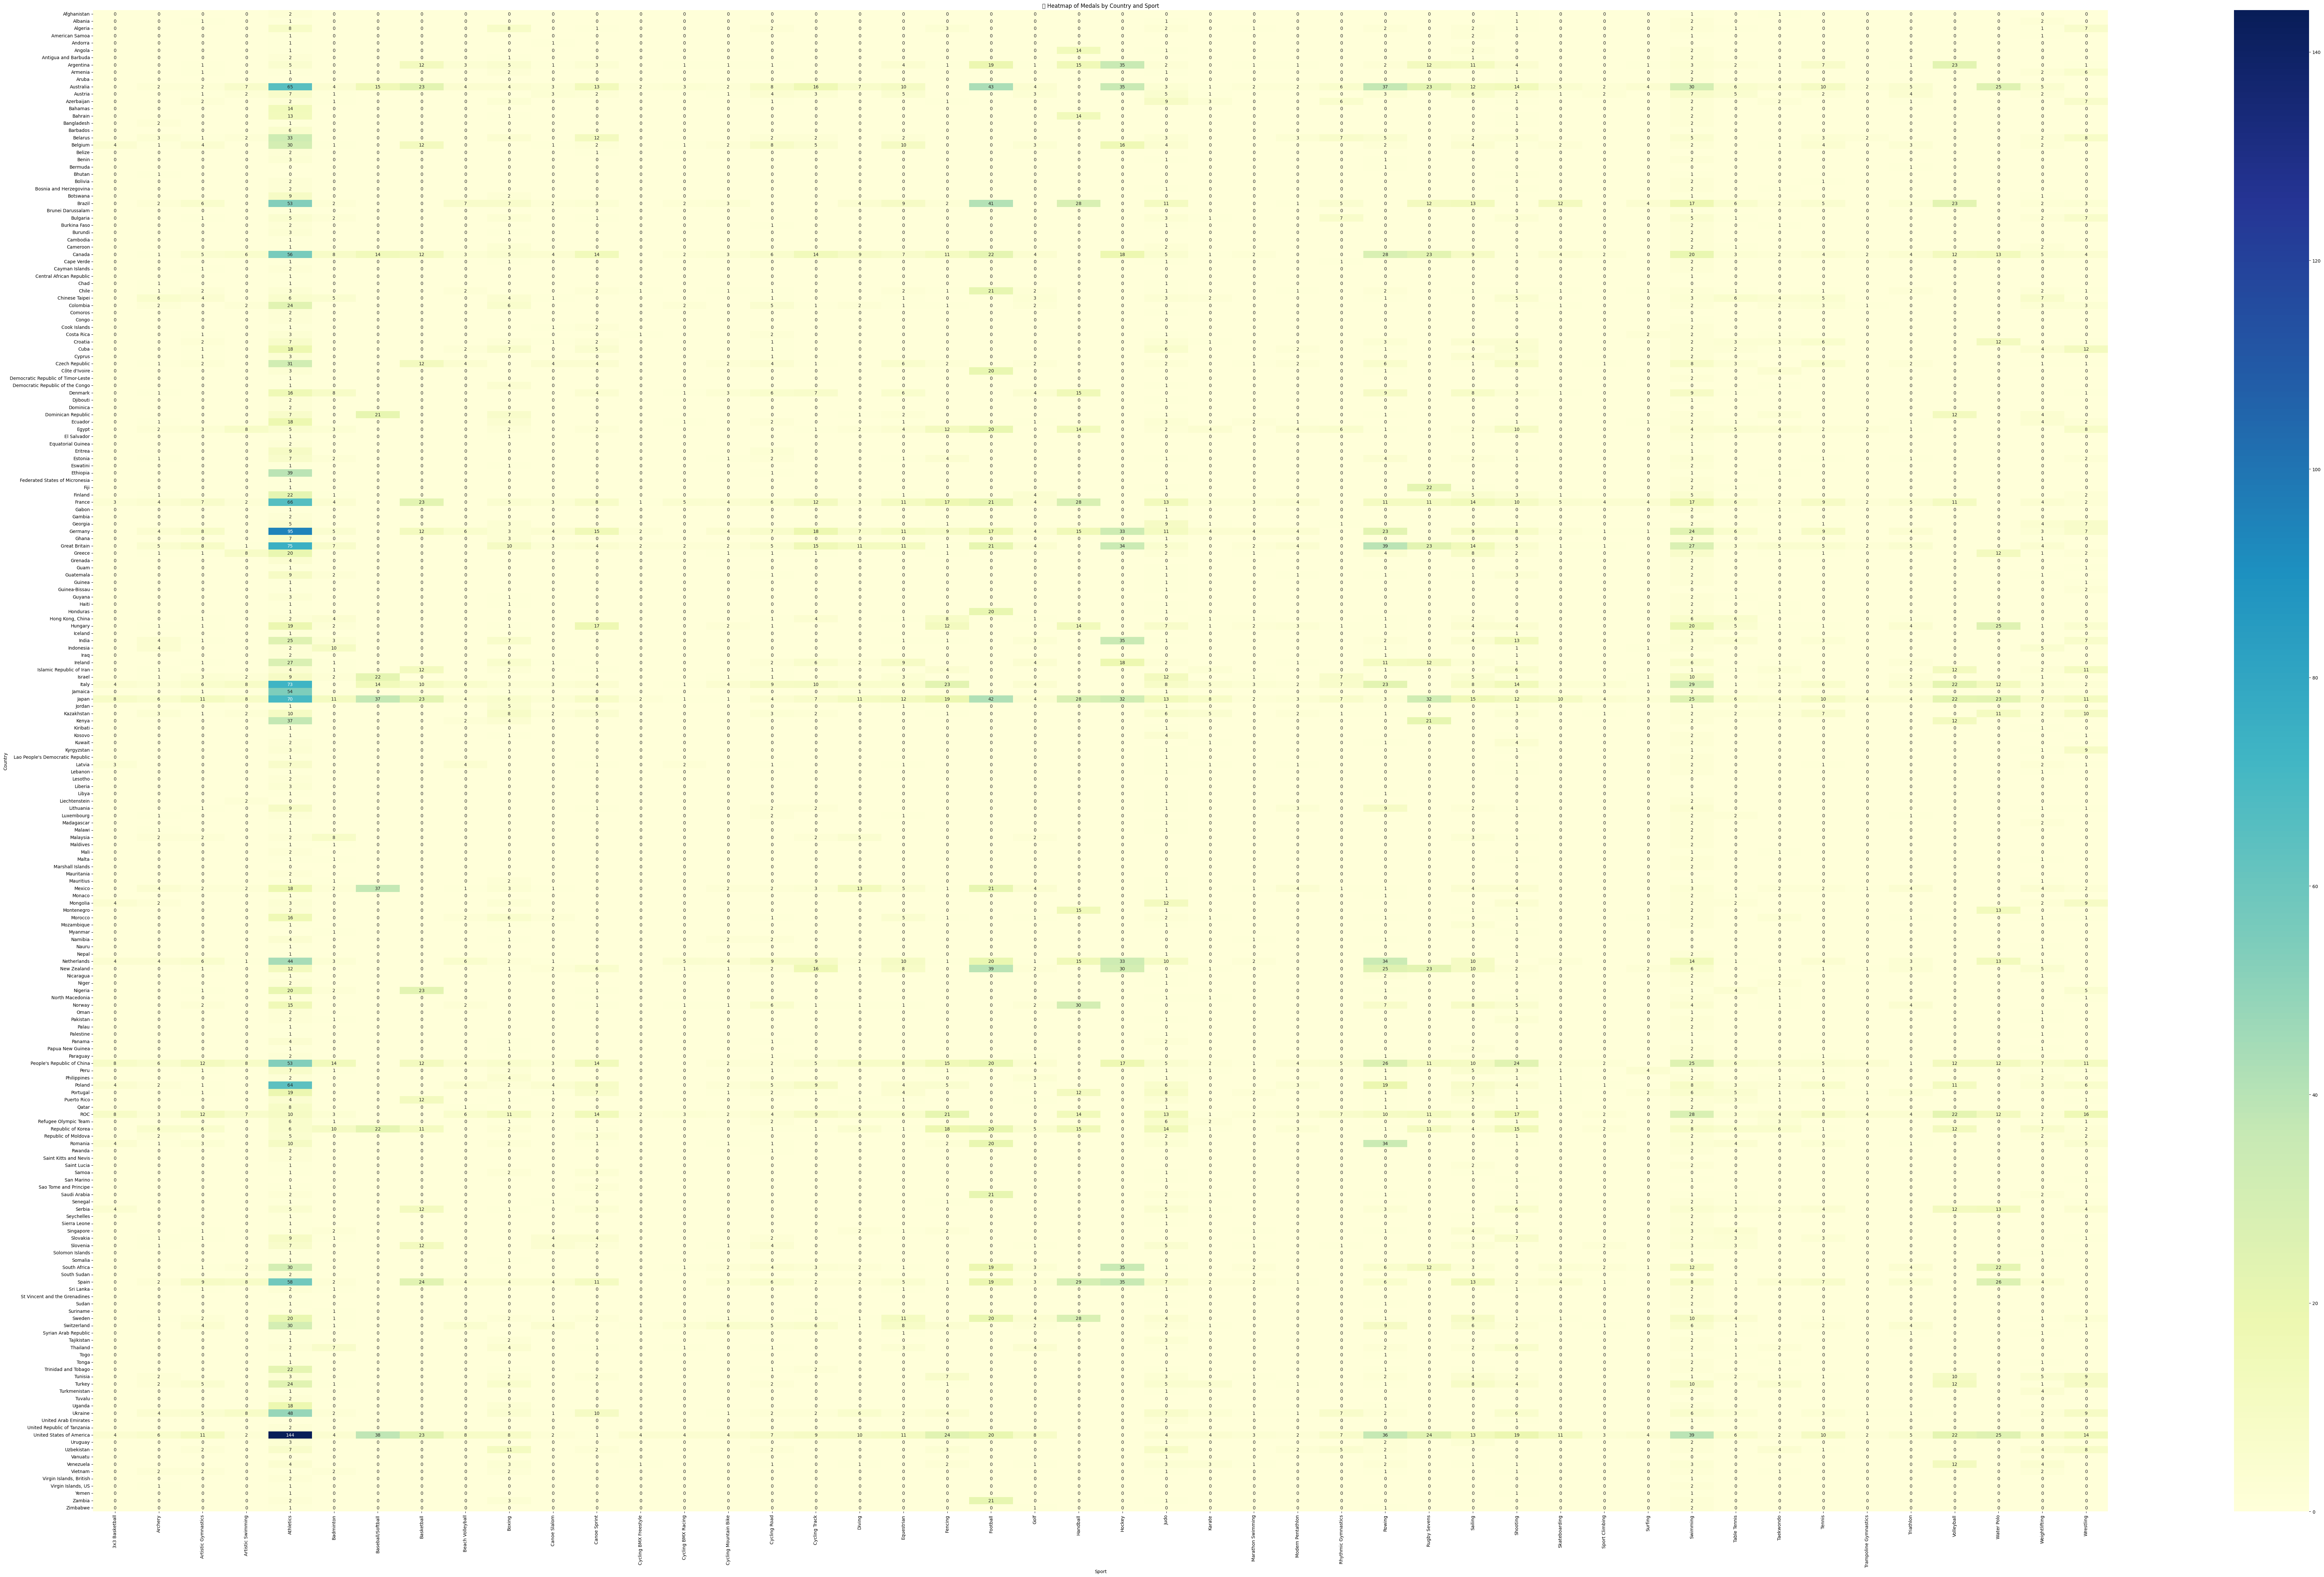

In [14]:
pivot = df.pivot_table(index='NOC', columns='Discipline', aggfunc='size', fill_value=0)
plt.figure(figsize=(100,60))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title("🔥 Heatmap of Medals by Country and Sport")
plt.xlabel("Sport")
plt.ylabel("Country")
plt.show()

/tmp/ipython-input-16-2700864855.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_athletes.values, y=top_athletes.index, palette='magma')
/tmp/ipython-input-16-2700864855.py:7: UserWarning: Glyph 127894 (\N{MILITARY MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127894 (\N{MILITARY MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


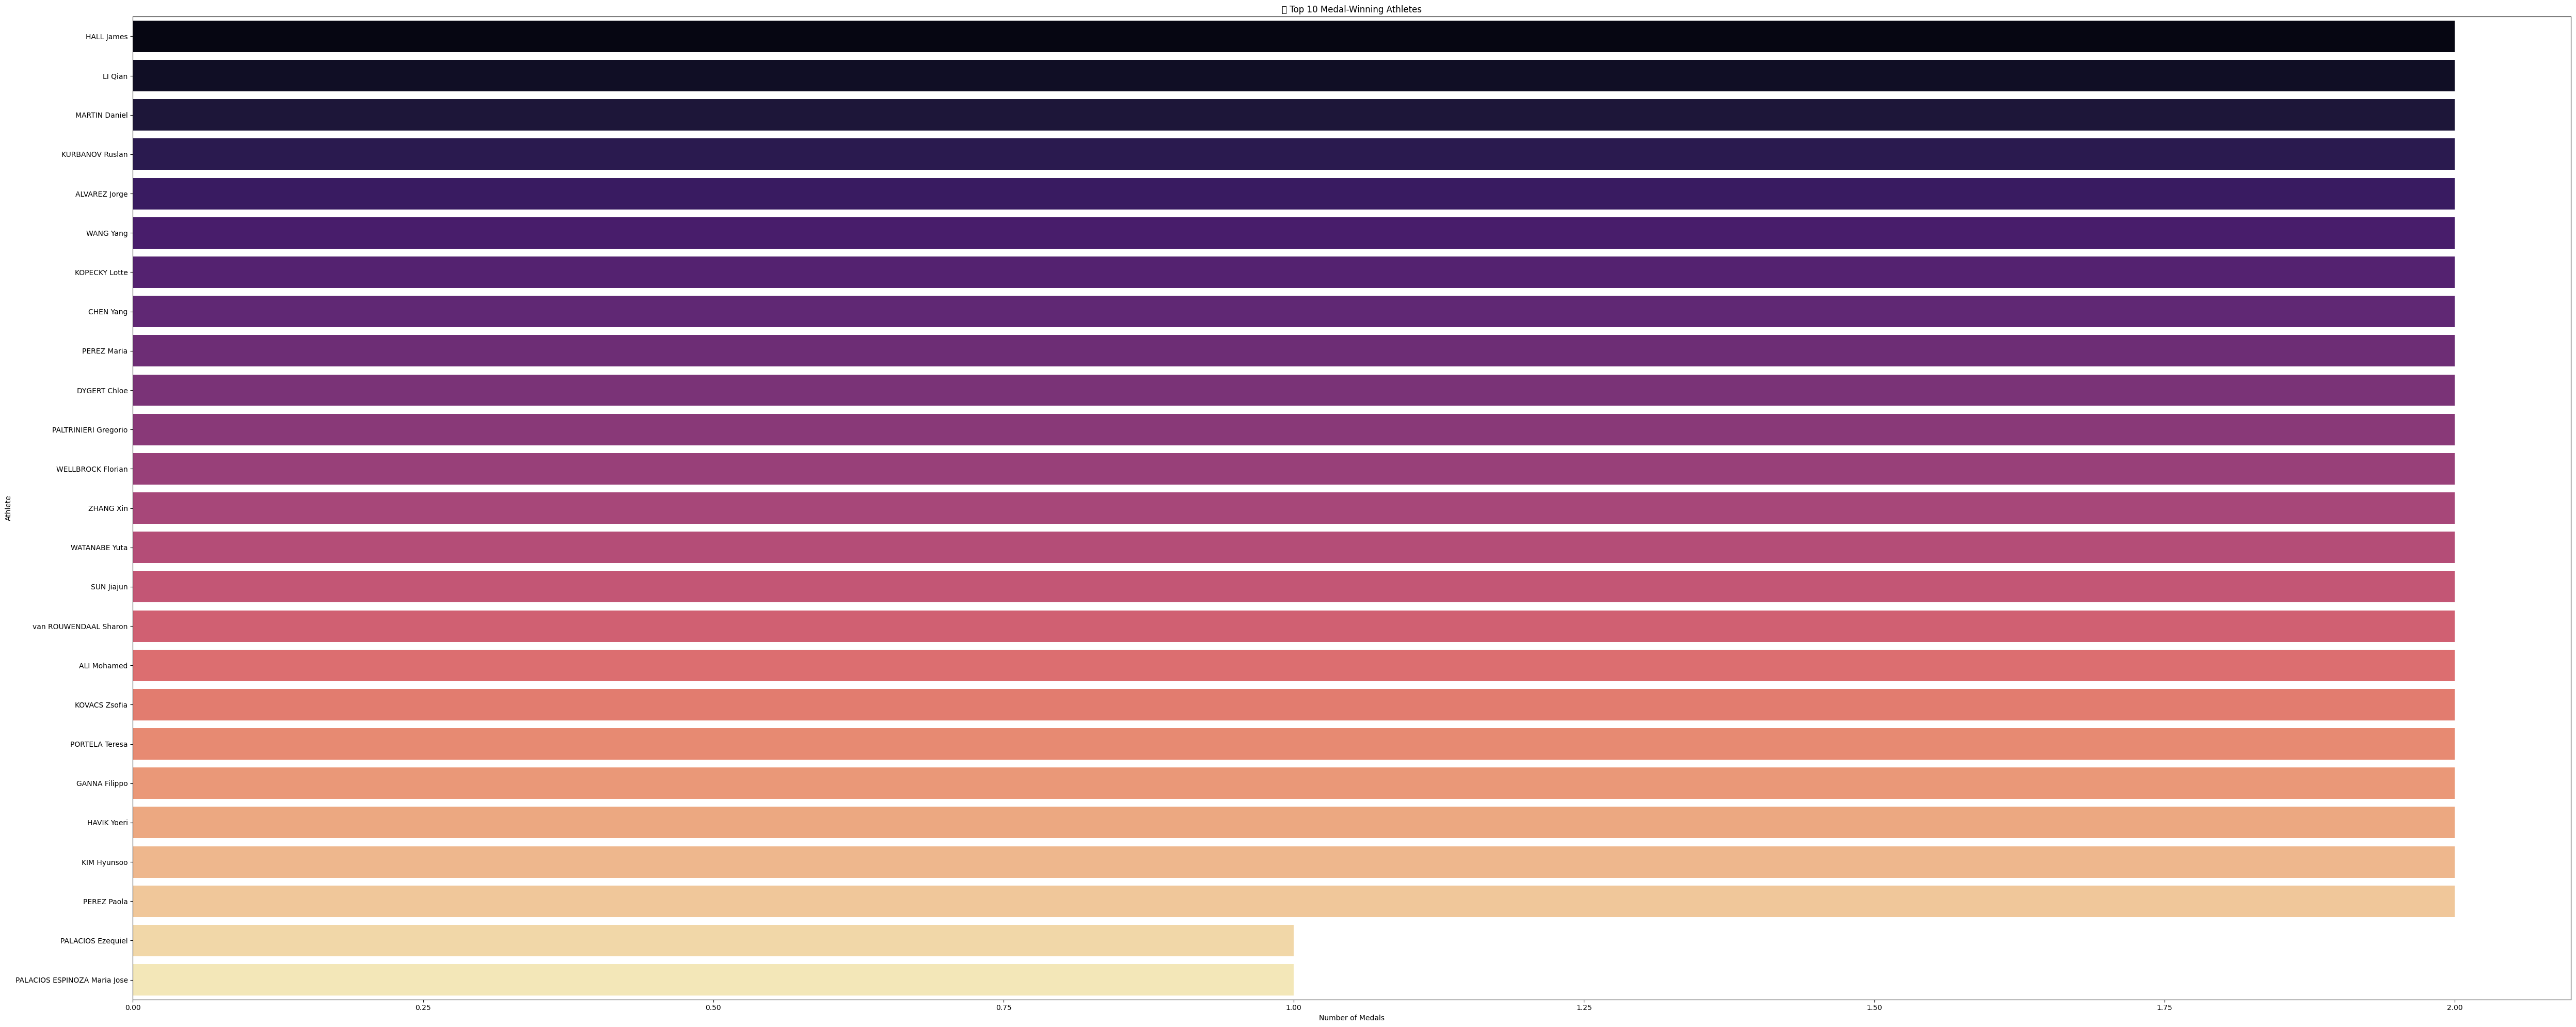

In [16]:
plt.figure(figsize=(50,20))
top_athletes = df['Name'].value_counts().head(25)
sns.barplot(x=top_athletes.values, y=top_athletes.index, palette='magma')
plt.title("🎖️ Top 10 Medal-Winning Athletes")
plt.xlabel("Number of Medals")
plt.ylabel("Athlete")
plt.tight_layout()
plt.show()


In [18]:
sport_country = df.groupby(['NOC', 'Discipline']).size().unstack(fill_value=0)
sport_country.plot(kind='bar', stacked=True, figsize=(100,60), colormap='tab20')
plt.title("🏆 Medal Distribution by Country and Sport")
plt.xlabel("Country")
plt.ylabel("Medals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-18-112009914.py:7: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


In [23]:
top_sport_per_country = df.groupby(['NOC', 'Discipline']).size().reset_index(name='Medals')
top_sport = top_sport_per_country.loc[top_sport_per_country.groupby('NOC')['Medals'].idxmax()]
plt.figure(figsize=(100,60))
sns.barplot(x='NOC', y='Medals', hue='Discipline', data=top_sport)
plt.title("🏅 Top Sport Per Country")
plt.tight_layout()
plt.show()

/tmp/ipython-input-23-3504887346.py:6: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
